In [258]:
# Importing all the libraries needed for project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import kruskal

# Importing dataset and understanding the data

In [259]:
# Importing dataset and printing any 5 random rows

df = pd.read_csv("bank_data.csv")
df.sample(5)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
199,1806,953,438.145000,Level 0 Recovery,35,Male
1239,537,2956,3745.843475,Level 2 Recovery,48,Male
1587,272,4744,6142.977460,Level 3 Recovery,80,Male
997,1687,2207,2024.615988,Level 2 Recovery,37,Male
218,1988,977,389.590000,Level 0 Recovery,18,Male


In [260]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [261]:
df.shape

(1882, 6)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [263]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


([<matplotlib.patches.Wedge at 0x297663549a0>,
 [Text(-0.058730827510827886, 1.098431012808676, 'Male'),
  Text(0.05873082751082775, -1.098431012808676, 'Female')],
 [Text(-0.03203499682408793, 0.5991441888047323, '51.700%'),
  Text(0.03203499682408786, -0.5991441888047323, '48.300%')])

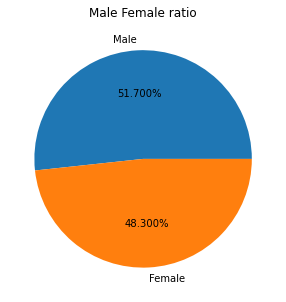

In [264]:
gender = df.sex.value_counts()
plt.figure(figsize=(10,5))
plt.title("Male Female ratio")
plt.pie(gender, labels=gender.index, autopct='%1.3f%%')

# Graphical exploratory data analysis

Does the customer age show a jump (discontinuity) at the \\$1000 threshold or does that age vary smoothly? We can examine this by first making a scatter plot of the age as a function of Expected Recovery Amount for a small window of Expected Recovery Amount, \\$0 to \\$2000. This range covers Levels 0 and 1.

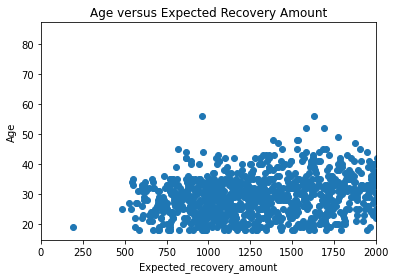

In [265]:
''' We can notice from the scatter plot that customer age didn't show a jump(discontinuity) at the 
 $1000 threshold,so it means that age vary smoothly. '''

plt.scatter(x=df['expected_recovery_amount'], y=df['age'])
plt.xlim(0,2000)
plt.xlabel("Expected_recovery_amount")
plt.ylabel("Age")
plt.title("Age versus Expected Recovery Amount")
plt.show()

# Statistical test: age vs expected recovery amount

We want to convince ourselves that variables such as age and sex are similar above and below the \\$1000 Expected Recovery Amount threshold. We will be more confident in our conclusions if we do statistical analysis examining the average age of the customers just above and just below the threshold. We can start by exploring the range from \\$900 to \\$1100.

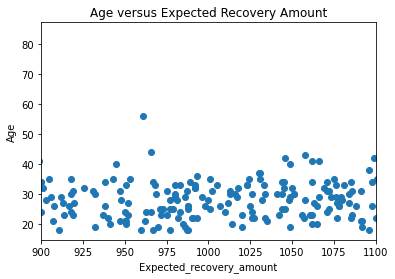

In [266]:
''' We can notice from the scatter plot that customer age didn't show a jump(discontinuity) at just 
above and just below the threshold, so it confirms that age vary smoothly. '''

plt.scatter(x=df['expected_recovery_amount'], y=df['age'])
plt.xlim(900,1100)
plt.xlabel("Expected_recovery_amount")
plt.ylabel("Age")
plt.title("Age versus Expected Recovery Amount")
plt.show()

We are now sure that customers just above and just below the $1000 threshold are, on average, similar in terms of their age.

# Statistical test: sex vs expected recovery amount
We want to also test that the percentage of customers that are male does not jump as well across the \\$1000 threshold. We can start by exploring the range of \\$900 to \\$1100 and later adjust this range.

Text(0.5, 1.0, 'Sex versus Expected Recovery Amount')

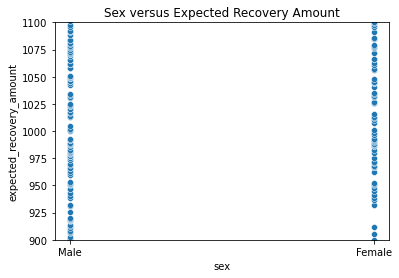

In [267]:
'''By exploring relation graphically with a scatter plot, we can now be able to convince ourselves that
there is no major jump in the average customer age just above and just below the $1000 threshold'''

sns.scatterplot(y='expected_recovery_amount', x='sex', data=df)
plt.ylim(900,1100)
plt.title("Sex versus Expected Recovery Amount")

Text(0.5, 1.0, 'Sex versus Expected Recovery Amount')

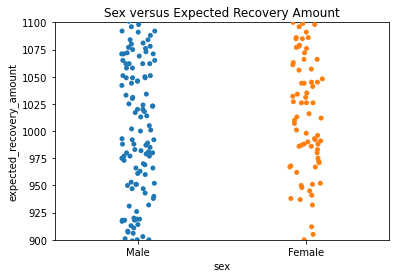

In [268]:
''' We can get more better intuition that there is no major jump in the average customer age just 
above and just below the $1000 threshold by plotting strip plot'''

sns.stripplot(y='expected_recovery_amount', x='sex', data=df)
plt.ylim(900,1100)
plt.title("Sex versus Expected Recovery Amount")

We are now sure that customers just above and just below the $1000 threshold are, on average, similar in terms of their sex.

# Exploratory graphical analysis: recovery amount

Develop a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between \\$900 to \\$1100. A key question is whether or not we see a discontinuity (jump) around the \\$1000 threshold.

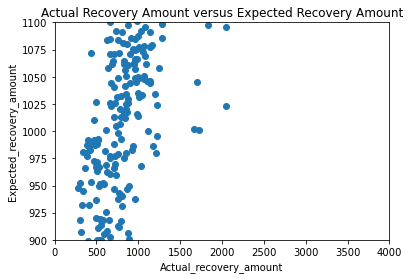

In [269]:
'''There is no discontinuity (jump) around the $1000 threshold for the relation between 
Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between 
\\$900 to \\$1100'''

plt.scatter(x=df['actual_recovery_amount'], y=df['expected_recovery_amount'])
plt.ylim(900,1100)
plt.xlim(0,4000)
plt.xlabel("Actual_recovery_amount")
plt.ylabel("Expected_recovery_amount")
plt.title("Actual Recovery Amount versus Expected Recovery Amount")
plt.show()

For the relation between Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between \\$900 to \\$1100, there is no discontinuity (jump) around the \\$1000 threshold.

# Statistical analysis: Recovery amount

Perform statistical tests to see if the actual recovery amount has a discontinuity above the \\$1000 threshold. We are going to do this for two different windows of the expected recovery amount \\$900 to $1100 and for a narrow range of \\$950 to \\$1050 to see if our results are consistent.The statistical test we will use is the Kruskal-Wallis test.

In [270]:
'''Kruskal-Wallis test to see if the actual recovery amount has a discontinuity above the $1000 
threshold for the window of expected recovery amount $900 to $1100'''

diff_900_1100 = df.loc[(df['expected_recovery_amount']<1100) & (df['expected_recovery_amount']>=900)]

by_recovery_strategy = diff_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['actual_recovery_amount'].describe().unstack()


below_threshold_window_1 = diff_900_1100.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
above_threshold_window_1 = diff_900_1100.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']

# Kruskal-Wallis test
statistic_window_1, p_value_window_1 = stats.kruskal(below_threshold_window_1,above_threshold_window_1)

# Setting significance level
alpha = 0.05  # Commonly, we set significance level 0.05

if p_value_window_1 < alpha:
    print("There is a significant discontinuity above the $1000 threshold for the first window.")
    print("The Kruskal-Wallis test p-value is:", p_value_window_1)
else:
    print("There is no significant discontinuity above the $1000 threshold for the first window.")
    print("The Kruskal-Wallis test p-value is:", p_value_window_1)

There is a significant discontinuity above the $1000 threshold for the first window.
The Kruskal-Wallis test p-value is: 6.177308752803109e-16


In [271]:
'''Kruskal-Wallis test to see if the actual recovery amount has a discontinuity above the $1000 
threshold for the window of expected recovery amount $950 to $1050'''

diff_950_1050 = df.loc[(df['expected_recovery_amount']<1050) & (df['expected_recovery_amount']>=950)]

below_threshold_window_2 = diff_950_1050.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
above_threshold_window_2  = diff_950_1050.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']

# Kruskal Wallis test
statistic_window_2, p_value_window_2 =stats.kruskal(below_threshold_window_2,above_threshold_window_2)

if p_value_window_2 < alpha:
    print("There is a significant discontinuity above the $1000 threshold for the second window.")
    print("The Kruskal-Wallis test p-value is:", p_value_window_2)
else:
    print("There is no significant discontinuity above the $1000 threshold for the second window.")
    print("The Kruskal-Wallis test p-value is:", p_value_window_2)

There is a significant discontinuity above the $1000 threshold for the second window.
The Kruskal-Wallis test p-value is: 3.80575314300276e-08


This results provides strong evidence that there is indeed a significant difference in the 'actual recovery amount' between the windows under consideration.

# Regression modeling: no threshold

Regression-based approach to estimate the impact of the program at the \\$1000 threshold using the data that is just above and just below the threshold. In order to do that, the first model does not have a threshold.

The model predicts the actual recovery amount (outcome or dependent variable) as a function of the expected recovery amount (input or independent variable). We expect that there will be a strong positive relationship between these two variables.

In [272]:
import statsmodels.api as sm

expected_recovery_amount = diff_900_1100['expected_recovery_amount'] 
actual_recovery_amount = diff_900_1100['actual_recovery_amount']

# Fit the first model (without threshold)
expected_recovery_amount = sm.add_constant(expected_recovery_amount)
model = sm.OLS(actual_recovery_amount, expected_recovery_amount).fit()

# Print the first model summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Fri, 21 Jul 2023   Prob (F-statistic):           1.56e-13
Time:                            17:56:42   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

The adjusted R-squared value is about 0.261.

# Regression modeling: adding true threshold

The model adds an indicator of the true threshold to the model. If there was no impact of the higher recovery strategy on the actual recovery amount, then we would expect that the relationship between the expected recovery amount and the actual recovery amount would be continuous.

In [273]:
expected_recovery_amount = diff_900_1100['expected_recovery_amount'] 
actual_recovery_amount = diff_900_1100['actual_recovery_amount']

# Binary indicator variable
binary_indicator = np.where(expected_recovery_amount <1000, 0, 1)

# Fit the model (with threshold indicator)
X = sm.add_constant(expected_recovery_amount)
X = np.column_stack((X, binary_indicator))

model_2 = sm.OLS(actual_recovery_amount, X).fit()

print(model_2.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Fri, 21 Jul 2023   Prob (F-statistic):           1.83e-15
Time:                            17:56:42   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

The adjusted R-squared value is about 0.314.

# Regression modeling: adjusting the window

In [274]:
# Filter the data within the new window of $950 to $1050
data = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

Expected_recovery_amount = data['expected_recovery_amount']
Actual_recovery_amount = data['actual_recovery_amount']

Binary_indicator = np.where(Expected_recovery_amount < 1000, 0, 1)

# Fit the model for the new window (with threshold indicator)
X_new = sm.add_constant(Expected_recovery_amount)
X_new = np.column_stack((X_new, Binary_indicator))

model_3 = sm.OLS(Actual_recovery_amount, X_new).fit()

print(model_3.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.287
Model:                                OLS   Adj. R-squared:                  0.273
Method:                     Least Squares   F-statistic:                     19.55
Date:                    Fri, 21 Jul 2023   Prob (F-statistic):           7.33e-08
Time:                            17:56:42   Log-Likelihood:                -699.42
No. Observations:                     100   AIC:                             1405.
Df Residuals:                          97   BIC:                             1413.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       